In [30]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt 

from sklearn.metrics import mean_squared_error, r2_score



Link to scipy: <br>
https://scipy-lectures.org/intro/scipy/auto_examples/plot_curve_fit.html

In [54]:
np.random.seed(12345)

x_data = np.linspace(-5, 5, num= 500)
y_data = 2.9 * np.cos(1.5 * x_data+ 5) + np.random.normal(size=500)

The data has the following parameters: <br>
$A_0$ = 2.9 <br>
$\omega = 1.5$ <br>
$\phi = 5$ 

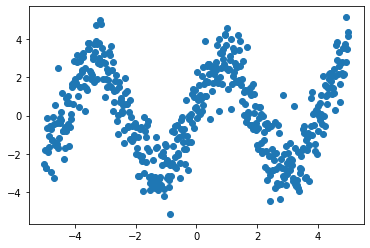

In [55]:
plt.scatter(x_data, y_data)

Fitting using sklearn

In [78]:
from scipy import optimize
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class Cosine(BaseEstimator, TransformerMixin):
    def __init__(self, omega= 1, phi = 1):
        #Initialization of model parameters
        self.omega= omega 
        self.phi= phi
        self.model = LinearRegression()
        self.coefs= None 
        self.amplitudes= None
        self.params_covariance= None
    
    @staticmethod
    def harmonic_funct(x, omega, phi):
        return np.cos(omega*x + phi)
        
    def _fit_params(self, X, y):
        params, params_covariance = optimize.curve_fit(self.harmonic_funct, X, y,
                                               p0=[self.omega, self.phi])
        #Update omega and phi with scipy parameters (optimization)
        self.omega = params[0]
        self.phi= params[1]
        self.params_covariance= params_covariance
        #self.amplitudes= params[0]
    
    def _transform_params(self, X): 
        omega = self.omega*np.ones(len(X))
        phi = self.phi*np.ones(len(X))
        #a0= np.ones(len(X))
        x_new= np.cos(omega*X+ phi)
        x_new = x_new[:, np.newaxis]
        return x_new
    
    def fit(self, X, y):
        self._fit_params(X, y)
        X_transf= self._transform_params(X)
        self.model.fit(X_transf, y)
        self.coefs= self.model.coef_
        return self
    
    def predict(self, X):
        X_transf= self._transform_params(X)
        ypred= self.model.predict(X_transf)
        return ypred
        
    

In [79]:
# random split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [80]:
#USING THE HARMONIC CLASS
c= Cosine()
c.fit(X_train, y_train)
y_pred = c.predict(X_test)


In [81]:
print(c.omega, c.phi)
#print(c.amplitudes)
print(c.coefs)

0.5235834379553194 2.5552438722673867
[0.39841119]


In [82]:
#Get rmse 
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print('rmse:', rmse)
print('r2:',r2)

rmse: 2.2536038778497804
r2: 0.033781758973464804


In [83]:
# Aplication of the model to the whole dataset
x= c._transform_params(x_data)
y = model.predict(x)

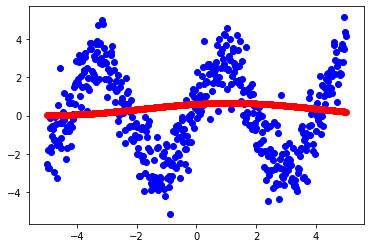

In [84]:
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, label= 'observations', color= 'b')
ax.scatter(x_data, y, label= 'predictions', color= 'r')